In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline  

In [2]:
#wireshark에서 copy as a stream 시 가져올 수 있음
#무작위 183길이의 beacon frame 20개 저장
#나중에는 유사 패킷들을 모으는걸 계층적 군집화로 자동화 구현해야할듯



#802.11 유사한 패킷 20개
packets = [
    '00001800ee58000010028509a000e39c5200004708267e0580000000ffffffffffff0016b6f71d510016b6f71d5160b282e138962800000064000106000c3330204d756e726f65205374010482848b960301060504000100000706555349010b1a0c120f0003a4000027a4000042435e0062322f002a010032088c129824b048606cdd15000af50a0240c000030103050e04ff000300110101dd180050f20201010f0003a4000027a4000042435e0062322f0008267e05',
    '00001800ee58000010028509a000e29c64000046478fd61380000000ffffffffffff0016b6f71d510016b6f71d51a0b2c0233f962800000064000106000c3330204d756e726f65205374010482848b960301060504000100000706555349010b1a0c120f0003a4000027a4000042435e0062322f002a010032088c129824b048606cdd15000af50a0240c000030103050e04ff000300110101dd180050f20201010f0003a4000027a4000042435e0062322f00478fd613',
    '00001800ee58000010028509a000e39c520000476356715980000000ffffffffffff0016b6f71d510016b6f71d51d0b282d143962800000064000106000c3330204d756e726f65205374010482848b960301060504000100000706555349010b1a0c120f0003a4000027a4000042435e0062322f002a010032088c129824b048606cdd15000af50a0240c000030103050e04ff000300110101dd180050f20201010f0003a4000027a4000042435e0062322f0063567159',
    '00001800ee58000010028509a000e29c5e000046dfb380a280000000ffffffffffff0016b6f71d510016b6f71d51e0b2826145962800000064000106000c3330204d756e726f65205374010482848b960301060504000100000706555349010b1a0c120f0003a4000027a4000042435e0062322f002a010032088c129824b048606cdd15000af50a0240c000030103050e04ff000300110101dd180050f20201010f0003a4000027a4000042435e0062322f00dfb380a2',
    '00001800ee58000010028509a000e29c6400004609046d2180000000ffffffffffff0016b6f71d510016b6f71d51f0b282f146962800000064000106000c3330204d756e726f65205374010482848b960301060504000100000706555349010b1a0c120f0003a4000027a4000042435e0062322f002a010032088c129824b048606cdd15000af50a0240c000030103050e04ff000300110101dd180050f20201010f0003a4000027a4000042435e0062322f0009046d21',
    '00001800ee58000010028509a000e49c640000484f8fb38f80000000ffffffffffff0016b6f71d510016b6f71d51a0b3829156962800000064000106000c3330204d756e726f65205374010482848b960301060504000100000706555349010b1a0c120f0003a4000027a4000042435e0062322f002a010032088c129824b048606cdd15000af50a0240c000030103050e04ff000300110101dd180050f20201010f0003a4000027a4000042435e0062322f004f8fb38f',
    '00001800ee58000010028509a000e39c58000047f95c0bb380000000ffffffffffff0016b6f71d510016b6f71d51c0b382b159962800000064000106000c3330204d756e726f65205374010482848b960301060504000100000706555349010b1a0c120f0003a4000027a4000042435e0062322f002a010032088c129824b048606cdd15000af50a0240c000030103050e04ff000300110101dd180050f20201010f0003a4000027a4000042435e0062322f00f95c0bb3',
    '00001800ee58000010028509a000e39c5e000047fbb9b64880000000ffffffffffff0016b6f71d510016b6f71d5170b482c167962800000064000106000c3330204d756e726f65205374010482848b960301060504000100000706555349010b1a0c120f0003a4000027a4000042435e0062322f002a010032088c129824b048606cdd15000af50a0240c000030103050e04ff000300110101dd180050f20201010f0003a4000027a4000042435e0062322f00fbb9b648',
    '00001800ee58000010028509a000e39c5e0000473922fefa80000000ffffffffffff0016b6f71d510016b6f71d51f0b4824174962800000064000106000c3330204d756e726f65205374010482848b960301060504000100000706555349010b1a0c120f0003a4000027a4000042435e0062322f002a010032088c129824b048606cdd15000af50a0240c000030103050e04ff000300110101dd180050f20201010f0003a4000027a4000042435e0062322f003922fefa',
    '00001800ee58000010028509a000e19c6400004507a3c7e880000000ffffffffffff0016b6f71d510016b6f71d5110b5826177962800000064000106000c3330204d756e726f65205374010482848b960301060504000100000706555349010b1a0c120f0003a4000027a4000042435e0062322f002a010032088c129824b048606cdd15000af50a0240c000030103050e04ff000300110101dd180050f20201010f0003a4000027a4000042435e0062322f0007a3c7e8',
    '00001800ee58000010028509a000e29c580000467958dc9e80000000ffffffffffff0016b6f71d510016b6f71d5160b6828193962800000064000106000c3330204d756e726f65205374010482848b960301060504000100000706555349010b1a0c120f0003a4000027a4000042435e0062322f002a010032088c129824b048606cdd15000af50a0240c000030103050e04ff000300110101dd180050f20201010f0003a4000027a4000042435e0062322f007958dc9e',
    '00001800ee58000010028509a000e29c5e0000469fe92bc780000000ffffffffffff0016b6f71d510016b6f71d5180b682a196962800000064000106000c3330204d756e726f65205374010482848b960301060504000100000706555349010b1a0c120f0003a4000027a4000042435e0062322f002a010032088c129824b048606cdd15000af50a0240c000030103050e04ff000300110101dd180050f20201010f0003a4000027a4000042435e0062322f009fe92bc7',
    '00001800ee58000010028509a000e29c640000465699ad7c80000000ffffffffffff0016b6f71d510016b6f71d51d0b682519b962800000064000106000c3330204d756e726f65205374010482848b960301060504000100000706555349010b1a0c120f0003a4000027a4000042435e0062322f002a010032088c129824b048606cdd15000af50a0240c000030103050e04ff000300110101dd180050f20201010f0003a4000027a4000042435e0062322f005699ad7c',
    '00001800ee58000010028509a000e29c640000467e0cc3ae80000000ffffffffffff0016b6f71d510016b6f71d5150b78241a6962800000064000106000c3330204d756e726f65205374010482848b960301060504000100000706555349010b1a0c120f0003a4000027a4000042435e0062322f002a010032088c129824b048606cdd15000af50a0240c000030103050e04ff000300110101dd180050f20201010f0003a4000027a4000042435e0062322f007e0cc3ae',
    '00001800ee58000010028509a000e49c58000048db36f3a280000000ffffffffffff0016b6f71d510016b6f71d51c0b88281c5962800000064000106000c3330204d756e726f65205374010482848b960301060504000100000706555349010b1a0c120f0003a4000027a4000042435e0062322f002a010032088c129824b048606cdd15000af50a0240c000030103050e04ff000300110101dd180050f20201010f0003a4000027a4000042435e0062322f00db36f3a2',
    '00001800ee58000010028509a000e49c64000048d810e53e80000000ffffffffffff0016b6f71d510016b6f71d51a0b98241d8962800000064000106000c3330204d756e726f65205374010482848b960301060504000100000706555349010b1a0c120f0003a4000027a4000042435e0062322f002a010032088c129824b048606cdd15000af50a0240c000030103050e04ff000300110101dd180050f20201010f0003a4000027a4000042435e0062322f00d810e53e',
    '00001800ee58000010028509a000e39c520000470072e0f580000000ffffffffffff0016b6f71d510016b6f71d5120ba82a1e1962800000064000106000c3330204d756e726f65205374010482848b960301060504000100000706555349010b1a0c120f0003a4000027a4000042435e0062322f002a010032088c129824b048606cdd15000af50a0240c000030103050e04ff000300110101dd180050f20201010f0003a4000027a4000042435e0062322f000072e0f5',
    '00001800ee58000010028509a000e49c64000048adb3180f80000000ffffffffffff0016b6f71d510016b6f71d51a0ba8221ee962800000064000106000c3330204d756e726f65205374010482848b960301060504000100000706555349010b1a0c120f0003a4000027a4000042435e0062322f002a010032088c129824b048606cdd15000af50a0240c000030103050e04ff000300110101dd180050f20201010f0003a4000027a4000042435e0062322f00adb3180f',
    '00001800ee58000010028509a000e39c64000047e345660a80000000ffffffffffff0016b6f71d510016b6f71d5160bb8251ff962800000064000106000c3330204d756e726f65205374010482848b960301060504000100000706555349010b1a0c120f0003a4000027a4000042435e0062322f002a010032088c129824b048606cdd15000af50a0240c000030103050e04ff000300110101dd180050f20201010f0003a4000027a4000042435e0062322f00e345660a',
    '00001800ee58000010028509a000e49c5200004831076bfa80000000ffffffffffff0016b6f71d510016b6f71d5120bc828110972800000064000106000c3330204d756e726f65205374010482848b960301060504000100000706555349010b1a0c120f0003a4000027a4000042435e0062322f002a010032088c129824b048606cdd15000af50a0240c000030103050e04ff000300110101dd180050f20201010f0003a4000027a4000042435e0062322f0031076bfa'
]


In [14]:

#gquic-q043 프로토콜의 유사한 패킷 17개 (전체 바이트 배열임) (길이가 같은 패킷만 선별함)
packets = [
    'd850e6449bd88c8590794fe608004500004215bb0000401192fbc0a801664a7dc569da7501bb002e78710ca089fa845f8b2dd1022678c9b2f4d11abe7cee813640021532020201000106010003b30601',
    'd850e6449bd88c8590794fe6080045000042d3c500004011d4f0c0a801664a7dc569da7501bb002e40150ca089fa845f8b2dd108774af0ba127a75dbb81d8cbf7ec361f10fac3c92564dd4f5b418589f',
    'd850e6449bd88c8590794fe6080045000042715d000040113759c0a801664a7dc569da7501bb002e1cb80ca089fa845f8b2dd109cc7da16929c75283fa7248593a50994e601d4a978a9a2cbcb613a4c6',
    'd850e6449bd88c8590794fe6080045000042d87e00004011d037c0a801664a7dc569da7501bb002ee8f70ca089fa845f8b2dd10ada63562163814072528333b15c0d98e3c56387274e5991203a733b2b',
    'd850e6449bd88c8590794fe6080045000042ba5200004011ee63c0a801664a7dc569da7501bb002eabff0ca089fa845f8b2dd10ba3a1bb5ff7e6c28af963f045a56c61ac5e144edaf8a6667e78dd9f11',
    'd850e6449bd88c8590794fe608004500004265c90000401142edc0a801664a7dc569da7501bb002e20100ca089fa845f8b2dd10cc6529b75413d96d366613bdbe876adf1a98c5809bbd67de0e13a2b21',
    'd850e6449bd88c8590794fe6080045000042bb4600004011ed6fc0a801664a7dc569da7501bb002efe870ca089fa845f8b2dd10d060cea689bd38b808aeed2192ffce8caf8280655bea9e766ed3cbc4a',
    'd850e6449bd88c8590794fe6080045000042020800004011a6aec0a801664a7dc569da7501bb002eb2df0ca089fa845f8b2dd11143f2cda6c67fa0542086fd9b531b6613140b89c2edc8d7ddbe16b609',
    'd850e6449bd88c8590794fe6080045000042555700004011535fc0a801664a7dc569da7501bb002e013d0ca089fa845f8b2dd1125d42ef9b37f80f91f97ba9dba5e653062c03e98060ec06786e10bd4f',
    'd850e6449bd88c8590794fe60800450000428ca1000040111c15c0a801664a7dc569da7501bb002e2fdc0ca089fa845f8b2dd1170bcaace54bf70a42941d7c8cd232fb6820862efd2c9c50d7453eaaec',
    'd850e6449bd88c8590794fe60800450000421440000040119476c0a801664a7dc569da7501bb002ecde80ca089fa845f8b2dd118f61e27086498f1e1b465436be9596c4627e26a2ae5e0f37bb679294d',
    'd850e6449bd88c8590794fe60800450000423db2000040116b04c0a801664a7dc569da7501bb002ee01e0ca089fa845f8b2dd10ec15cf93ceb19466cf2b588b978ff1f0b5142a8bc6fd3d24023909ad9',
    'd850e6449bd88c8590794fe608004500004212d50000401195e1c0a801664a7dc569da7501bb002e41f00ca089fa845f8b2dd110792d823c2edb2887108269bd85b1e0f48649f323240783b731311234',
    'd850e6449bd88c8590794fe6080045000042c61c00004011e299c0a801664a7dc569da7501bb002e76ac0ca089fa845f8b2dd113561df78482bd56759040bb3db51fec558b11be2bde63f08b0d212a6d',
    'd850e6449bd88c8590794fe6080045000042e6e500004011c1d0c0a801664a7dc569da7501bb002e4e460ca089fa845f8b2dd1148a6ea01475b7ab14648cfc9c258d666745ef8b8008c930ba4a66fe22',
    'd850e6449bd88c8590794fe6080045000042c72b00004011e18ac0a801664a7dc569da7501bb002e4bcb0ca089fa845f8b2dd115888eca7bf750e931e0c3eec77384b542cbc8b2d540b3b159daf116e6',
    'd850e6449bd88c8590794fe6080045000042014000004011a776c0a801664a7dc569da7501bb002ee9f60ca089fa845f8b2dd1169f4f27fceeeaa91afe5d86938e762f3886bbf411fd96deeff43302bd'
]

In [29]:
#bittorent 프로토콜 7개 (크기 균일화 수행)
packets = [
    'bcdf2000010000000100000008004500006c550a400080066291d57ad67fd5cac12b0f1537d3e9995a499b04d3e450182238ee8c000013426974546f7272656e742070726f746f636f6c00000000000000000164fe7ef1105c57764170edf603c439d64214f1b86a737fe80caf680259963724652756ee4d165b',
    'bcdf2000010000000100000008004500006c56454000800622e6d57ad67f3cea987c0f2e0584e9cac708e0bda9d35018223859ba000013426974546f7272656e742070726f746f636f6c00000000000000000164fe7ef1105c57764170edf603c439d64214f1b86a737fe80caf680259963724652756ee4d165b',
    'bcdf2000010000000100000008004500006c5649400080069efed57ad67f502509250f2a1ae1e9c4b59c3850880a501822389c26000013426974546f7272656e742070726f746f636f6c00000000000000000164fe7ef1105c57764170edf603c439d64214f1b86a737fe80caf680259963724652756ee4d165b',
    'bcdf2000010000000100000008004500006c56504000800631b6d57ad67fca58fc320f2b4737e9c6789b2b26d2d95018223801e8000013426974546f7272656e742070726f746f636f6c00000000000000000164fe7ef1105c57764170edf603c439d64214f1b86a737fe80caf680259963724652756ee4d165b',
    '000001000000bcdf2000010008004500008926f140006b06671d3cea987cd57ad67f05840f2ee0bda9d3e9cac74c5018ffbba0ff000013426974546f7272656e742070726f746f636f6c00000000000000000164fe7ef1105c57764170edf603c439d64214f12d415a323230322d7869684e726d764c79795455',
    '000001000000bcdf2000010008004500006c3ea140007106c5a650250925d57ad67f1ae10f2a3850880ae9c4b5e05018faaca9f6000013426974546f7272656e742070726f746f636f6c00000000000000000164fe7ef1105c57764170edf603c439d64214f12d415a323230322d3872444e5941676e36516639',
    '000001000000bcdf200001000800450000896b194000670635d0ca58fc32d57ad67f47370f2b2b26d2d9e9c678df5018ffbba494000013426974546f7272656e742070726f746f636f6c65780000000000000164fe7ef1105c57764170edf603c439d64214f1657862630038317b017533f41b1411a8ab28bb54'
]

In [37]:
packets = [
'feff200001000000010000000800450000280f444000800691f091fea0ed41d0e4df0d2c005038affe14114c618c501025bc79640000',
'000001000000feff20000100080045000028c09e40002f06319641d0e4df91fea0ed00500d2c114c618c38affff35010192084210000',
'feff200001000000010000000800450000280f4a4000800691ea91fea0ed41d0e4df0d2c005038affff3114c7c80501025bc5c910000',
'feff200001000000010000000800450000280f5c4000800691d891fea0ed41d0e4df0d2c005038affff3114ca9485010241431710000',
]

In [38]:
#2자리씩 끊어서 저장
hex_lists = []
for i in range(len(packets)):
    hex_list = [packets[i][j:j+2] for j in range(0, len(packets[i]), 2)]
    hex_lists.append(hex_list)



In [39]:
#int형 리스트로 변환
int_lists = []
for i in range(len(hex_lists)):
    int_list = []
    for j in range(len(hex_lists[i])):
        int_list.append(int(hex_lists[i][j], 16))
    int_lists.append(int_list)

In [40]:
#column 생성 (모든 패킷 길이가 같다고 가정)
column = []
for i in range(len(int_lists[0])):
    column.append(str(i))

In [41]:
#dataframe 생성
df = pd.DataFrame(int_lists, columns=column)

In [42]:
#상관계수 구하기
df_corr = df.corr()

<AxesSubplot: >

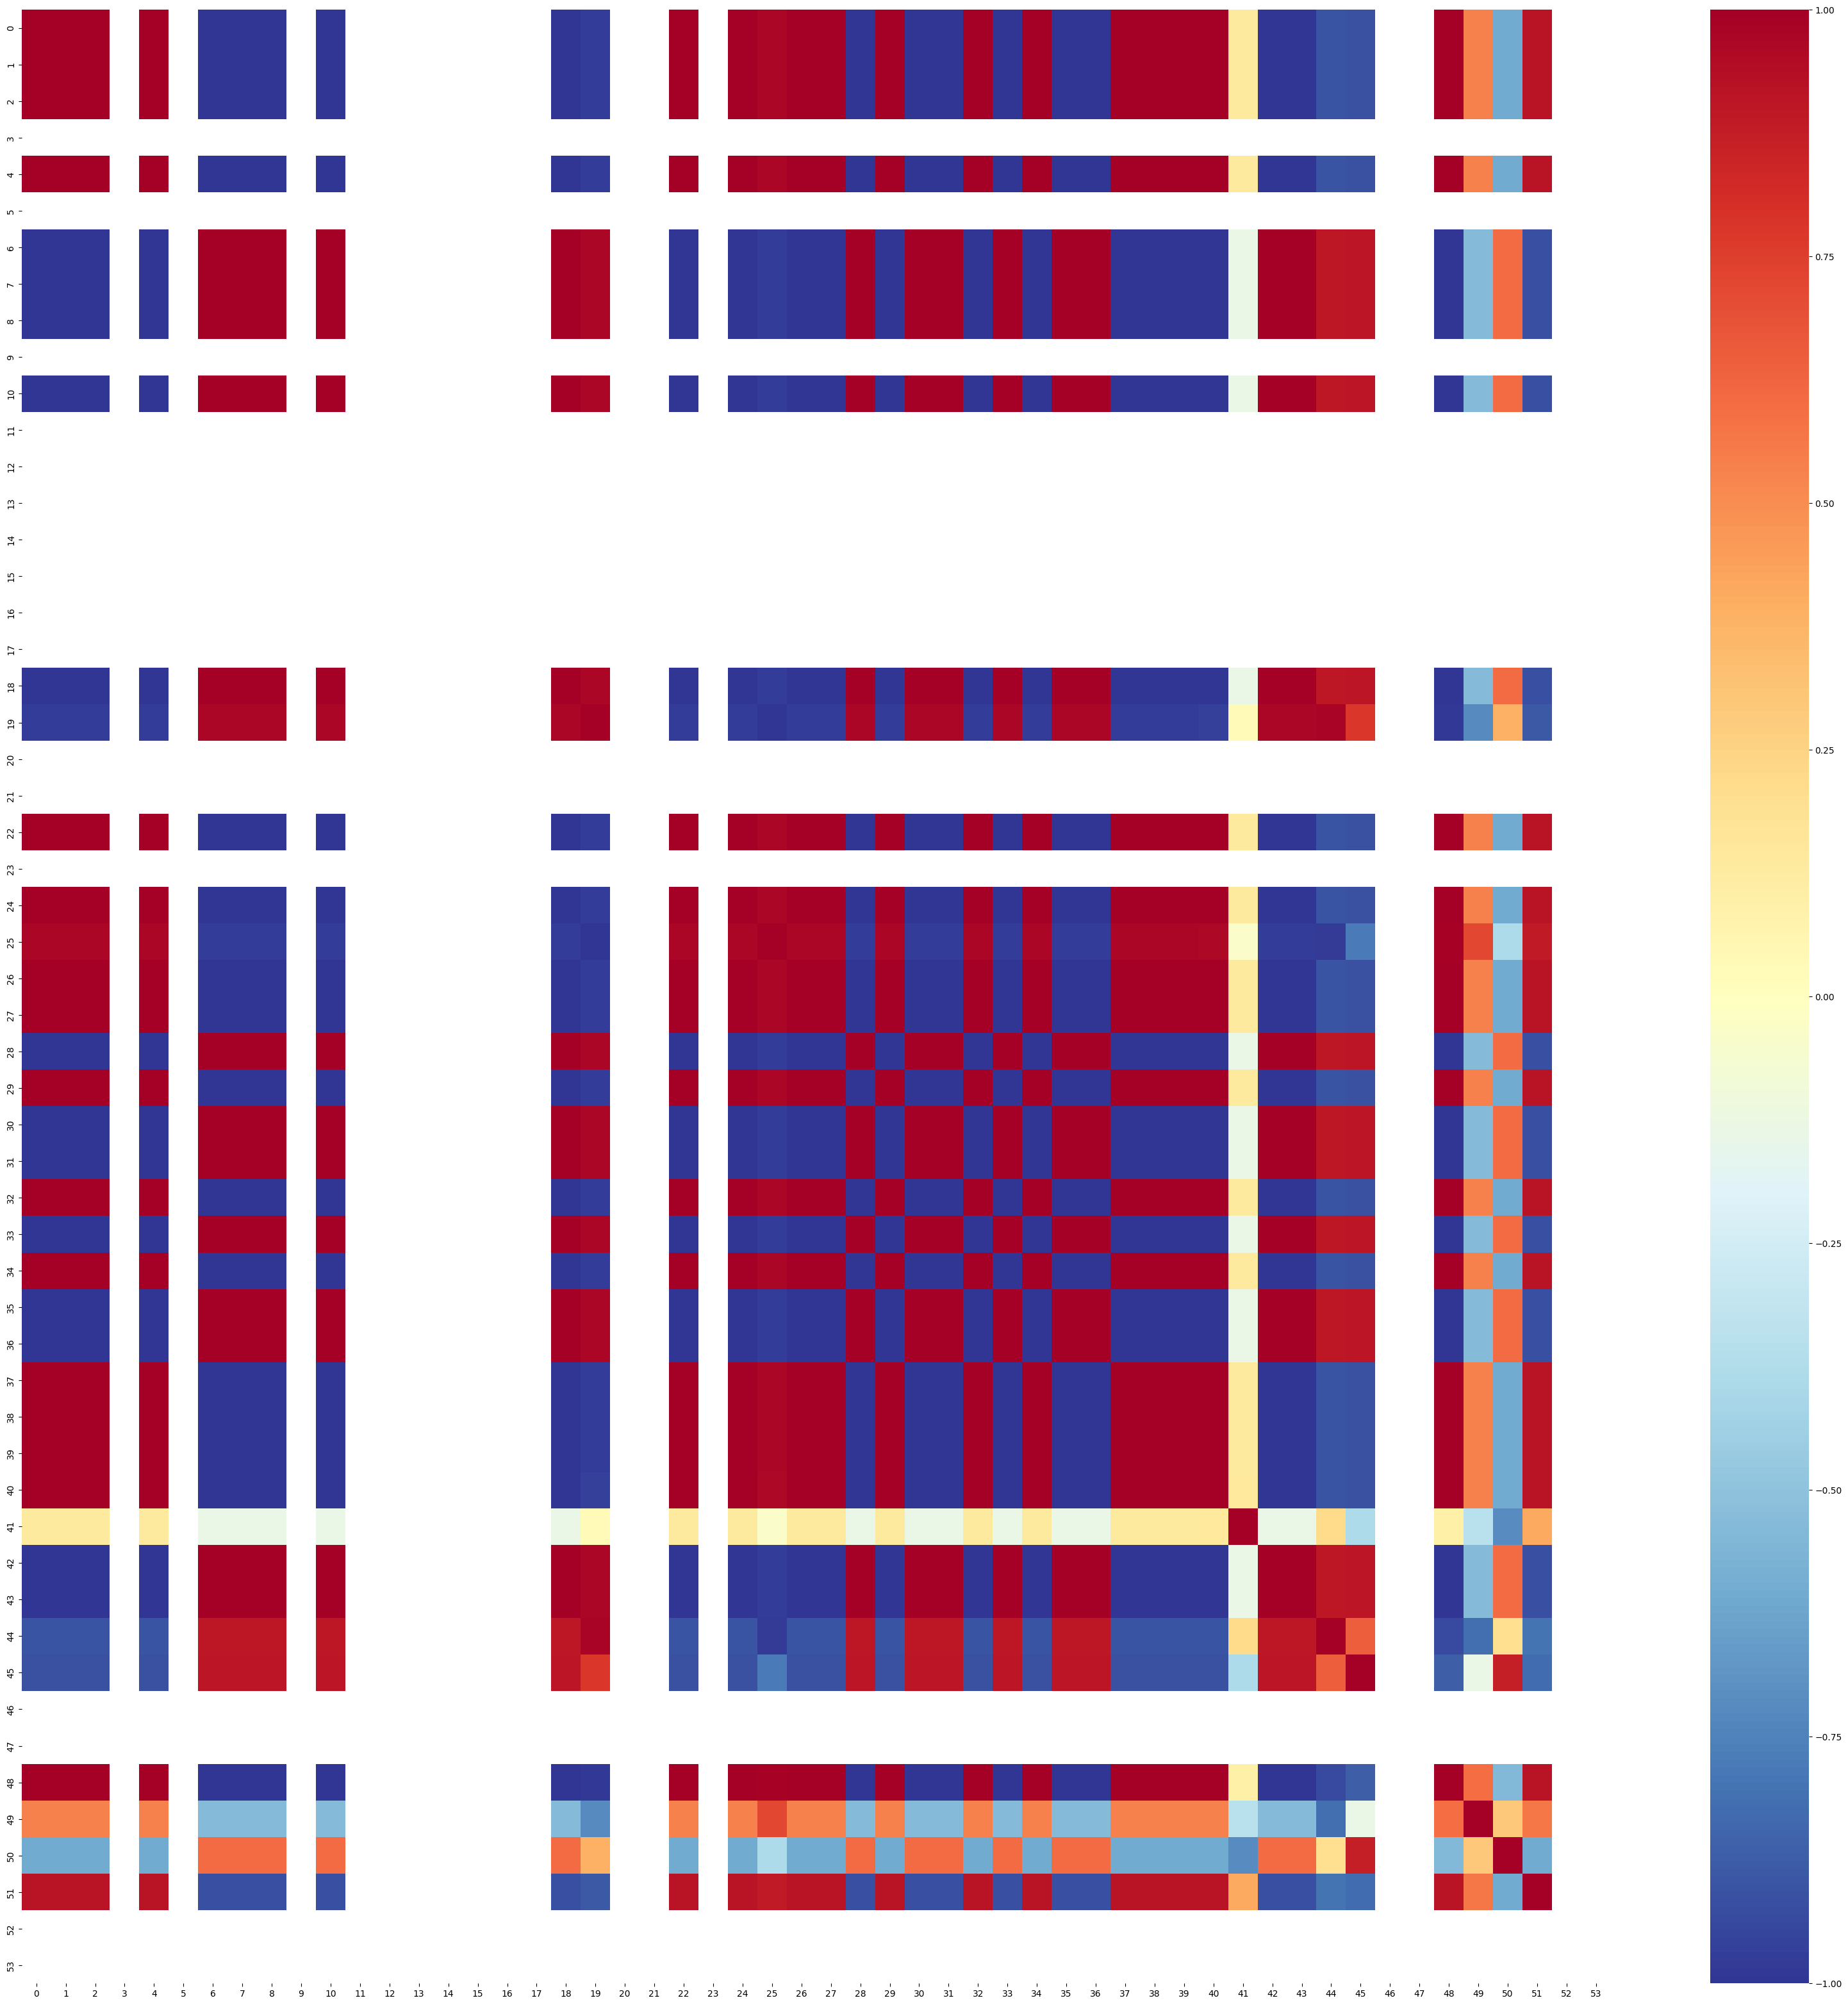

In [43]:
#heatmap 출력
plt.figure(figsize=(40, 40))
sns.heatmap(df_corr, cmap="RdYlBu_r", vmin = -1, vmax = 1)